# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [35]:
# Define an empty list to fetch the weather data for each city
city_weather = []
counter = 0 

# # Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# # Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

for city in cities:
    
    #gets response for each city
    response = requests.get(query_url + city).json()  
    
    #try/except statement to handle errors when city is not found on openweather site
    try:
        
        #create dictionary
        weather_dict = {
            "City": response['name'],
            "Lat": response['coord']['lat'],
            "Lng": response['coord']['lon'],
            "Max Temp": response['main']['temp_max'],
            "Humidity": response['main']['humidity'],
            "Cloudiness": response['clouds']['all'],
            "Wind Speed": response['wind']['speed'],
            "Country": response['sys']['country'],
            "Date": response['dt']
        }
        city_weather.append(weather_dict)
        
        counter = counter + 1
        
        print(f"{counter} City Name: {response['name']} / ID:{response['id']}")
        
 # If an error is experienced, skip the city   
    except:
        
        print("Missing city...skipping | " + city)

    # except:
    #     print("City not found. Skipping...")
    #     pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
# city_data

Beginning Data Retrieval     
-----------------------------
1 City Name: Natal / ID:3394023
2 City Name: Fort Bragg / ID:6941080
3 City Name: Zeya / ID:2012593
4 City Name: Waitangi / ID:4032804
5 City Name: Tiksi / ID:2015306
6 City Name: Kamina / ID:214614
7 City Name: Port-aux-Français / ID:1546102
8 City Name: Puerto Natales / ID:3874958
9 City Name: Callao / ID:3946083
10 City Name: Tralee / ID:2961123
11 City Name: Pathein / ID:1328421
12 City Name: Chibougamau / ID:5921147
13 City Name: Sungai Penuh / ID:1625929
14 City Name: Anadyr / ID:2127202
15 City Name: Edinburgh of the Seven Seas / ID:3370726
16 City Name: Aasiaat / ID:3424901
17 City Name: Hilo / ID:5855927
18 City Name: Codrington / ID:2171099
19 City Name: Adamstown / ID:4030723
20 City Name: Tazovsky / ID:1489853
21 City Name: Wokha / ID:1252840
22 City Name: Port Elizabeth / ID:964420
23 City Name: Kingston / ID:3489854
24 City Name: Asha / ID:580660
25 City Name: Geraldton / ID:2070998
26 City Name: Shchuchyn / ID:6

In [36]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_weather)

# Show Record Count
city_data_df.count()

City          592
Lat           592
Lng           592
Max Temp      592
Humidity      592
Cloudiness    592
Wind Speed    592
Country       592
Date          592
dtype: int64

In [37]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Natal,-5.7950,-35.2094,77.22,83,20,6.91,BR,1696911451
1,Fort Bragg,35.1390,-79.0060,60.94,65,0,9.22,US,1696911451
2,Zeya,53.7500,127.2667,51.49,47,68,3.31,RU,1696911451
3,Waitangi,-43.9535,-176.5597,50.83,74,24,11.01,NZ,1696911452
4,Tiksi,71.6872,128.8694,16.03,92,95,5.68,RU,1696911452


In [38]:
# Export the City_Data into a csv
city_data_df.to_csv("/Users/cindy/Desktop/Bootcamp/python-api-challenge/output_data/cities.csv", index_label="City_ID")

In [39]:
# Read saved data
city_data_df = pd.read_csv("/Users/cindy/Desktop/Bootcamp/python-api-challenge/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Natal,-5.7950,-35.2094,77.22,83,20,6.91,BR,1696911451
1,Fort Bragg,35.1390,-79.0060,60.94,65,0,9.22,US,1696911451
2,Zeya,53.7500,127.2667,51.49,47,68,3.31,RU,1696911451
3,Waitangi,-43.9535,-176.5597,50.83,74,24,11.01,NZ,1696911452
4,Tiksi,71.6872,128.8694,16.03,92,95,5.68,RU,1696911452


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

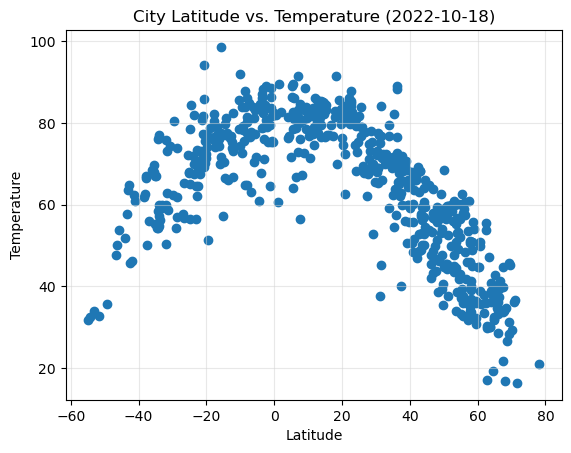

In [16]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.grid(color='lightgrey', alpha=0.5)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

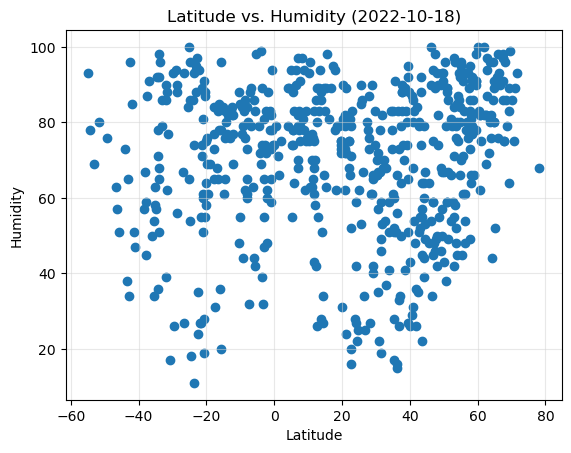

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title(f'Latitude vs. Humidity (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(color='lightgrey', alpha=0.5)

# Save the figure
plt.savefig("/Users/cindy/Desktop/Bootcamp/python-api-challenge/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

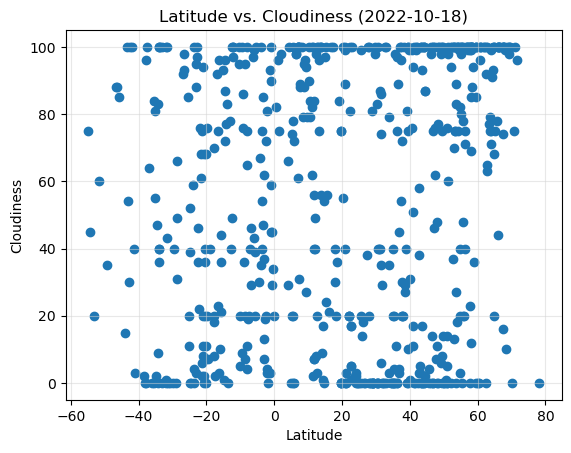

In [20]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title(f'Latitude vs. Cloudiness (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(color='lightgrey', alpha=0.5)

# Save the figure
plt.savefig("/Users/cindy/Desktop/Bootcamp/python-api-challenge/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

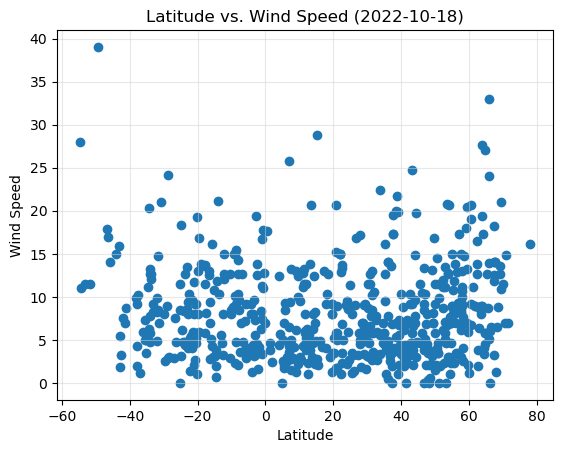

In [21]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title(f'Latitude vs. Wind Speed (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(color='lightgrey', alpha=0.5)

# Save the figure
plt.savefig("/Users/cindy/Desktop/Bootcamp/python-api-challenge/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Define a function to create Linear Regression plots
def linear (x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    print(f'The r-value is: {rvalue}')

In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Fort Bragg,35.1390,-79.0060,62.33,61,20,5.75,US,1696906393
2,Zeya,53.7500,127.2667,50.90,48,83,3.04,RU,1696906558
4,Tiksi,71.6872,128.8694,16.36,93,96,6.96,RU,1696906558
9,Tralee,52.2704,-9.7026,59.61,66,100,6.17,IE,1696906559
10,Pathein,16.7833,94.7333,79.54,89,100,4.16,MM,1696906735


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df ["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Natal,-5.7950,-35.2094,77.22,83,20,9.22,BR,1696906404
3,Waitangi,-43.9535,-176.5597,51.82,73,15,15.01,NZ,1696906558
5,Kamina,-8.7386,24.9906,64.78,86,7,4.81,CD,1696906558
6,Port-aux-Français,-49.3500,70.2167,35.62,76,35,39.03,TF,1696906559
7,Puerto Natales,-51.7236,-72.4875,32.85,80,60,11.48,CL,1696906559


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8776302131750744


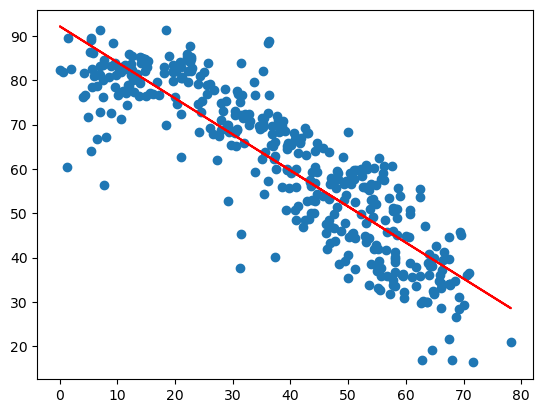

In [27]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
linear(x_values, y_values)

The r-value is: 0.7449453562830399


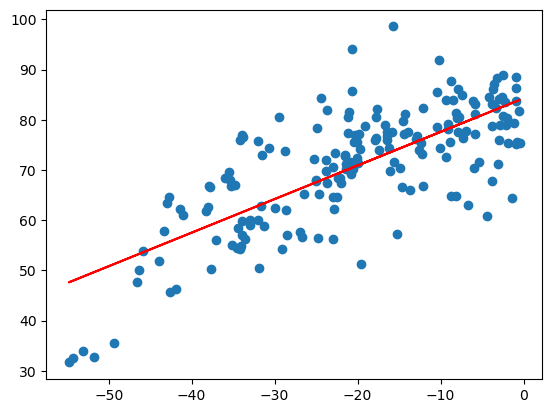

In [28]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
linear(x_values, y_values)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.15001047897958608


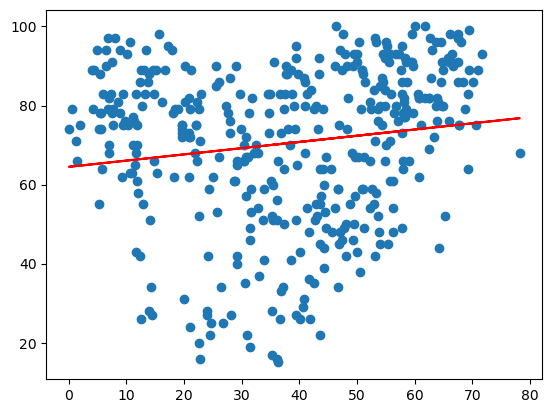

In [29]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
linear(x_values, y_values)

The r-value is: 0.07115258378141516


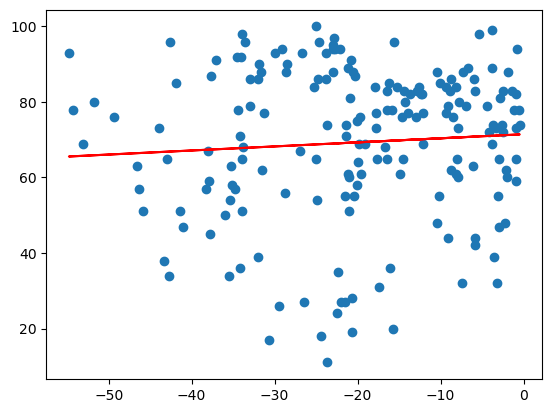

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
linear(x_values, y_values)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1640391333504817


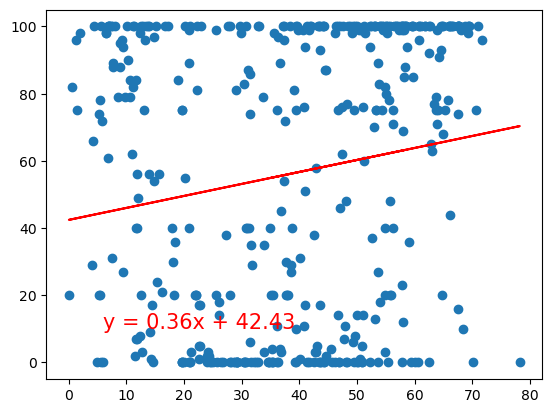

In [31]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
linear(x_values, y_values)


The r-value is: 0.002651222688664255


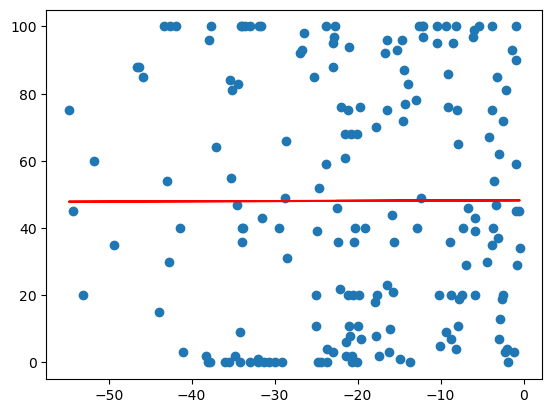

In [32]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
linear(x_values, y_values)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.1907797219211765


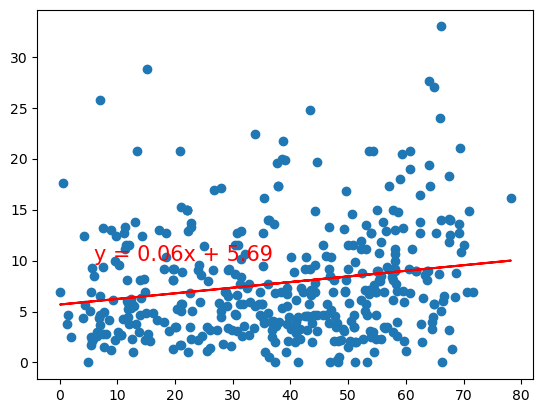

In [33]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
linear(x_values, y_values)

The r-value is: -0.19275883479895192


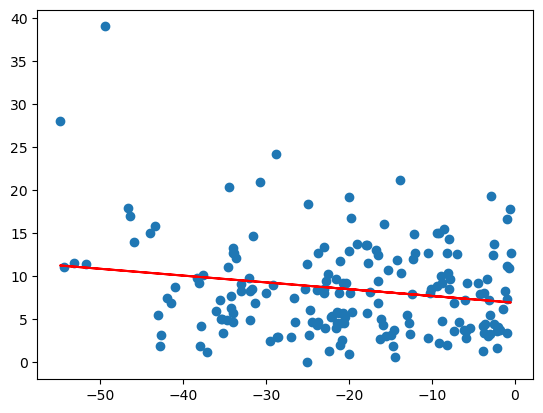

In [34]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
linear(x_values, y_values)

**Discussion about the linear relationship:** YOUR RESPONSE HERE